# Demo for source pruning

In [ ]:
import torch

from phaseGP.models import PhaseGP
from phaseGP.source_pruner import source_model_pruner
from phaseGP.utils import get_grid
from phaseGP.visualization import model_diagram_plot

from ground_truth.flory_phase import flory_true_phase
from ground_truth.true_phase import true_phase

def swapper(phase_diagram):
    phase_diagram[phase_diagram==1] = 3
    phase_diagram[phase_diagram==0] = 1
    phase_diagram[phase_diagram==3] = 0
    return phase_diagram


# Example of source pruning in supremolecular copolymerization benchmark

In [4]:
grid_points = get_grid(0, 2e-5,20)

sources = ["equilibrium_fracAA0.01_fracAB0.5", "equilibrium_fracAA0.1_fracAB5", "equilibrium_fracAA1_fracAB1", "equilibrium_fracAA0.1_fracAB0.5"]

equilibrium_source = [true_phase(grid_points, benchmark_name=benchmark) for benchmark in sources]

In [5]:
source_model_list = []
for phase_diagram in equilibrium_source:
    source_model = PhaseGP(grid_points, min_scale=0, max_scale=2e-5)
    source_model.fit(grid_points,phase_diagram)
    source_model_list.append(source_model)

## Total diagrams

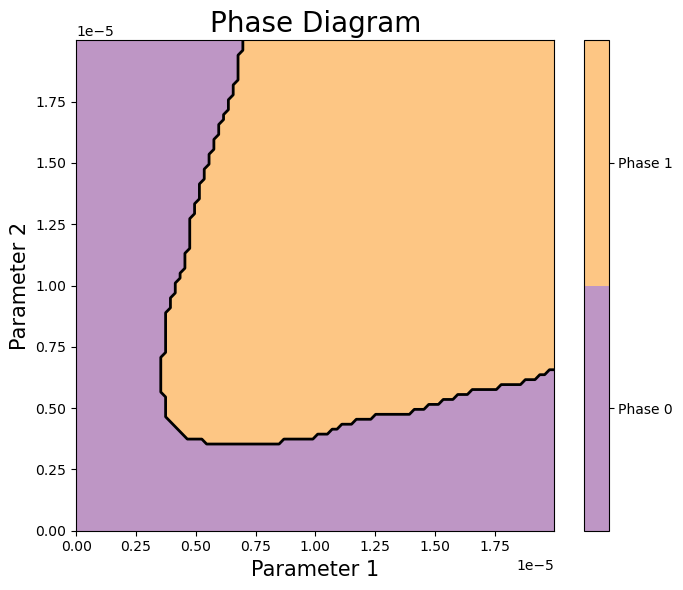

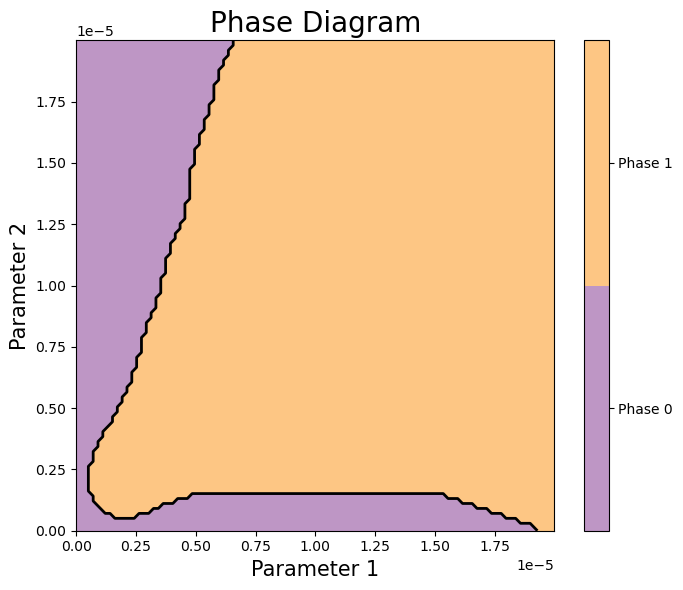

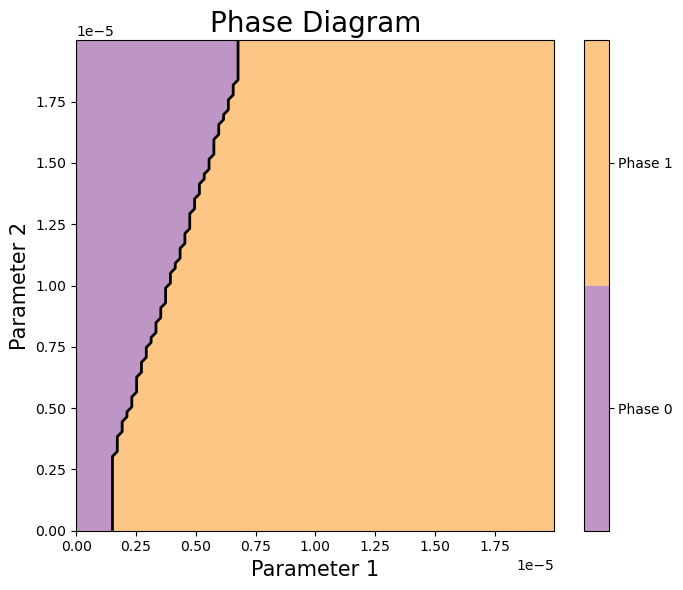

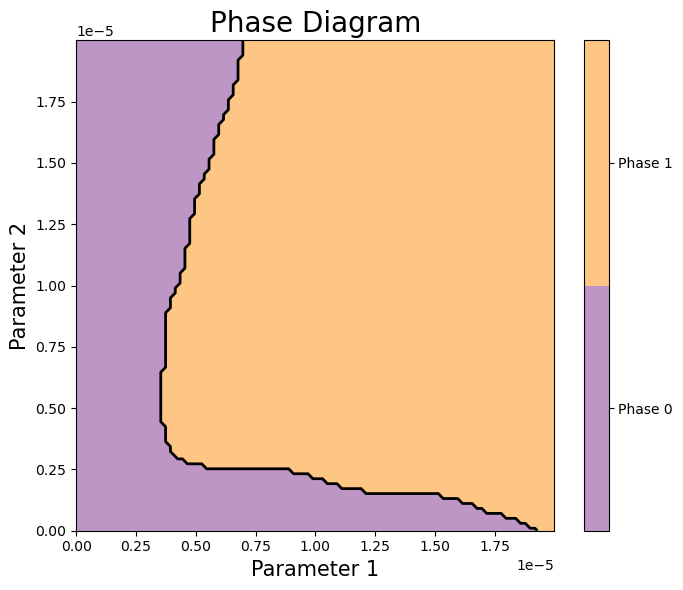

In [6]:
for model in source_model_list:
    fig, ax = model_diagram_plot(model, plot_type="phase", x_min =0, x_max = 2e-5,
                                  plot_boundary=True)

## Chosen Diagrams

4 source models --> 2 source models


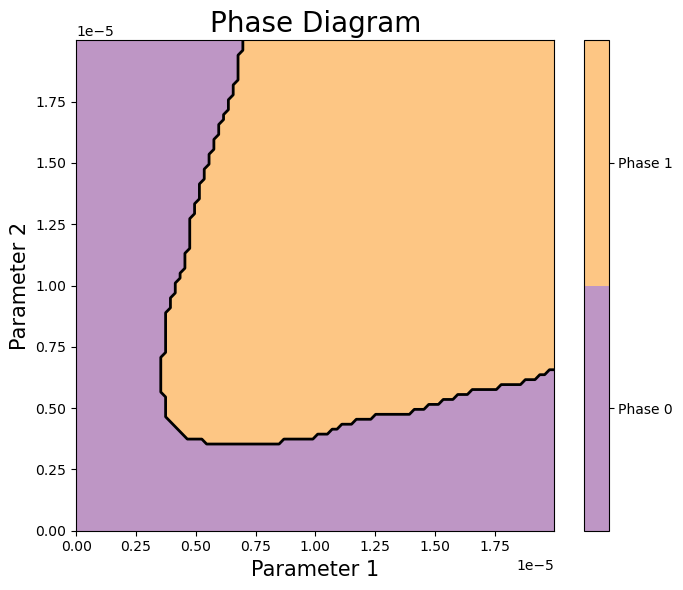

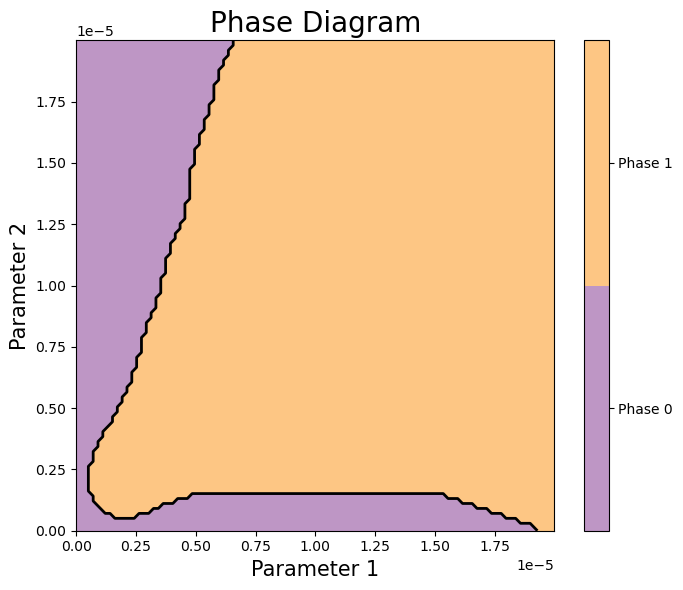

In [7]:
chosen_model_list = source_model_pruner(source_model_list, x_min=0, x_max=2e-5)
print(f"{len(source_model_list)} source models --> {len(chosen_model_list)} source models")
for model in chosen_model_list:
    fig, ax = model_diagram_plot(model, plot_type="phase", x_min =0, x_max = 2e-5,
                                  plot_boundary=True)

# Example of source pruning in 3-component biological condensate benchmark benchmark

In [8]:
x1 = torch.linspace(0.001, 0.999, 20)
x2 = torch.linspace(0.001, 0.999, 20)
X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
grid_points = torch.stack([X1.flatten(), X2.flatten()], dim=1)
    #CHANGE reshaping transpose bug
ionic_strengths = [0.01, 0.15, 0.3, 0.45, 0.6, 0.75]

flory_source = [swapper(flory_true_phase(grid_points, ionic_strength)) for ionic_strength in ionic_strengths]

for i in range(len(flory_source)):
    flory_source[i][flory_source[i]==2] = 0

In [9]:
source_model_list = []
for flory in flory_source:
    source_model = PhaseGP(grid_points, min_scale=0, max_scale=1)
    source_model.fit(grid_points, flory)
    source_model_list.append(source_model)

## Total Diagrams

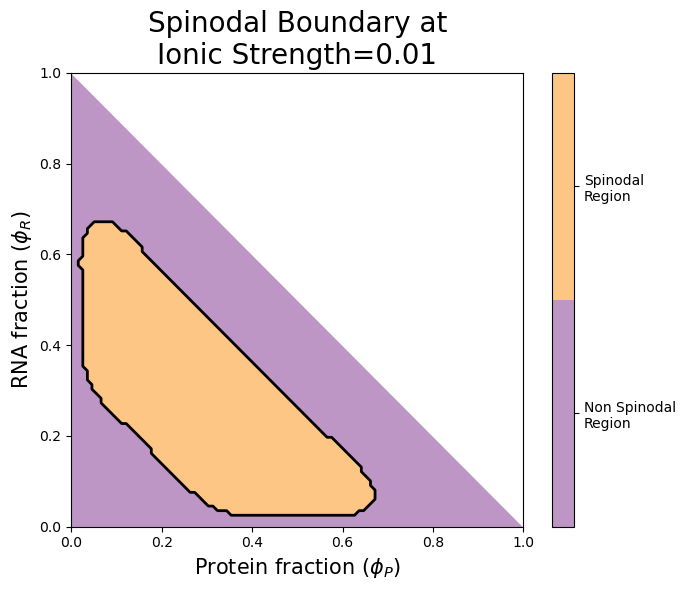

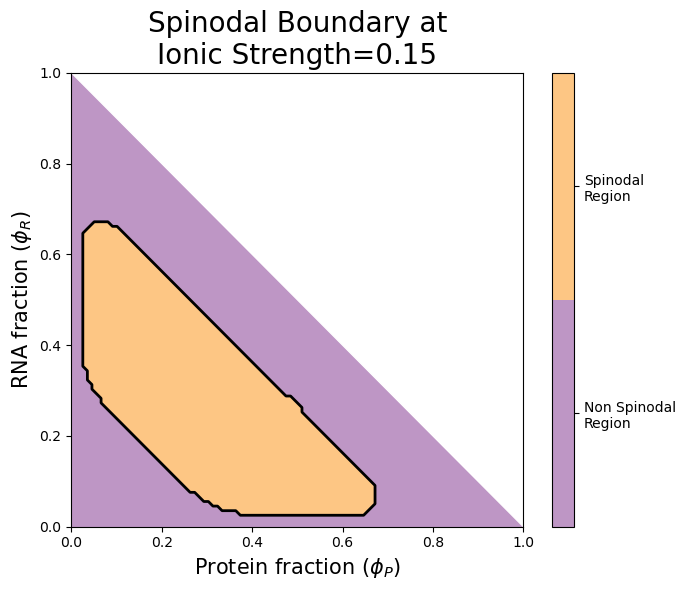

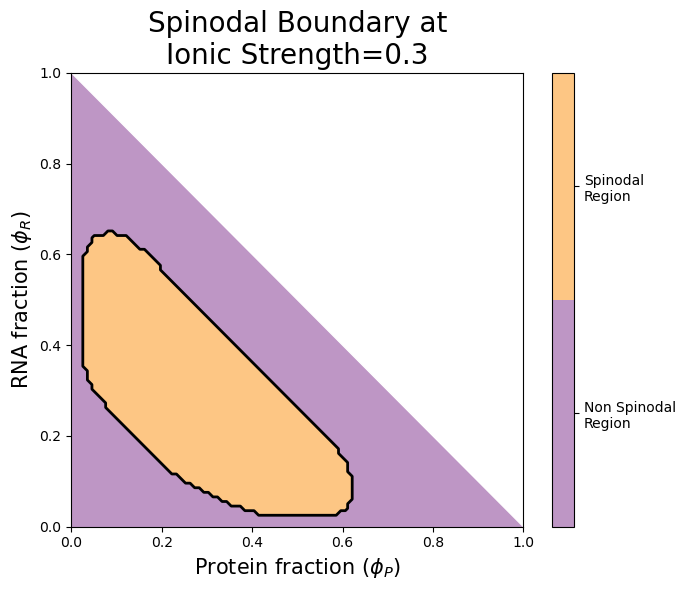

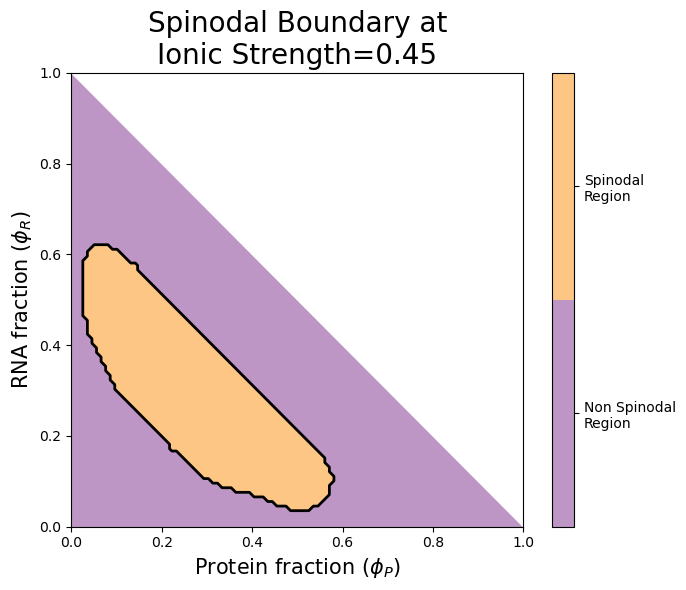

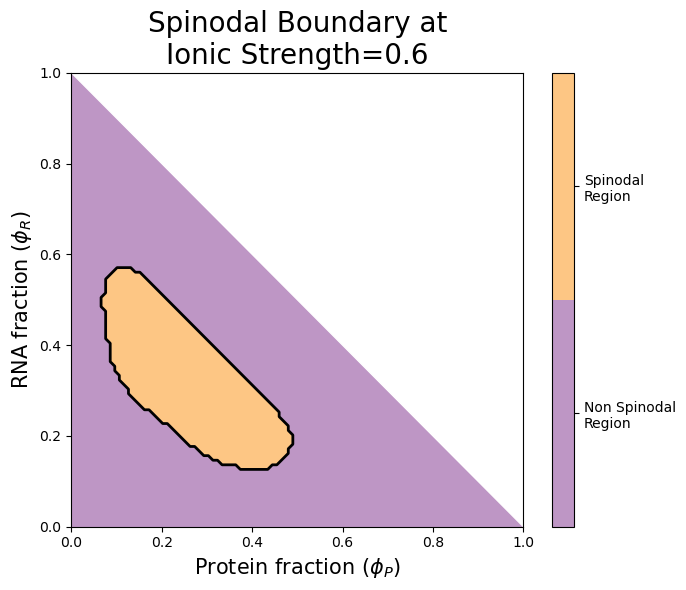

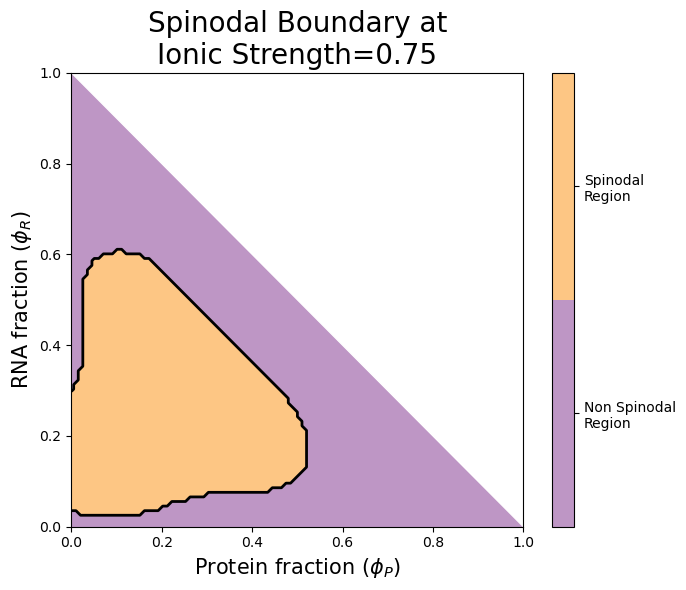

In [10]:
outbounds_x = [0, 1, 1, 0]  # Close the triangle by repeating the first point
outbounds_y = [1, 0, 1, 1]

# Create the plot

for model, ionic_strength in zip(source_model_list, ionic_strengths):
    fig, ax = model_diagram_plot(model, plot_type="phase", x_min =0, x_max = 1,
                                  plot_boundary=True, phase_labels=["Non Spinodal\nRegion", "Spinodal\nRegion"],
                            xlabel=r"Protein fraction $(\phi_P)$", ylabel=r"RNA fraction $(\phi_R)$", title=f"Spinodal Boundary at\nIonic Strength={ionic_strength}")
    ax.fill(outbounds_x, outbounds_y, color='white')

## Chosen Diagrams

6 source models --> 3 source models


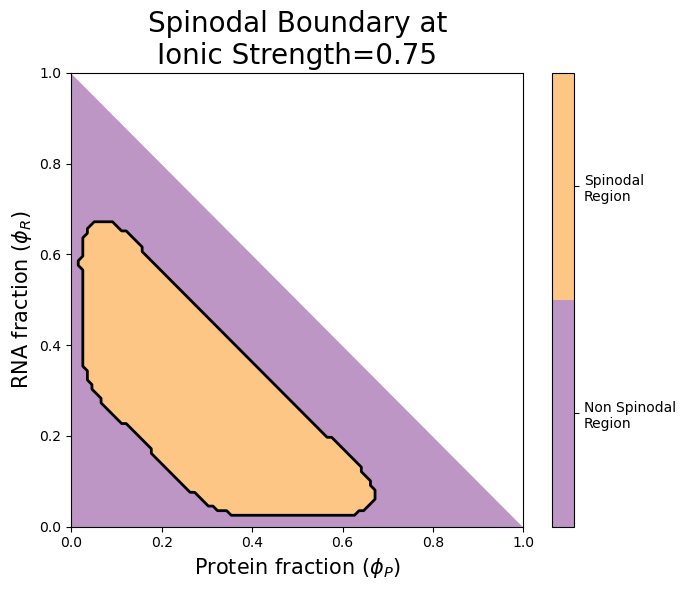

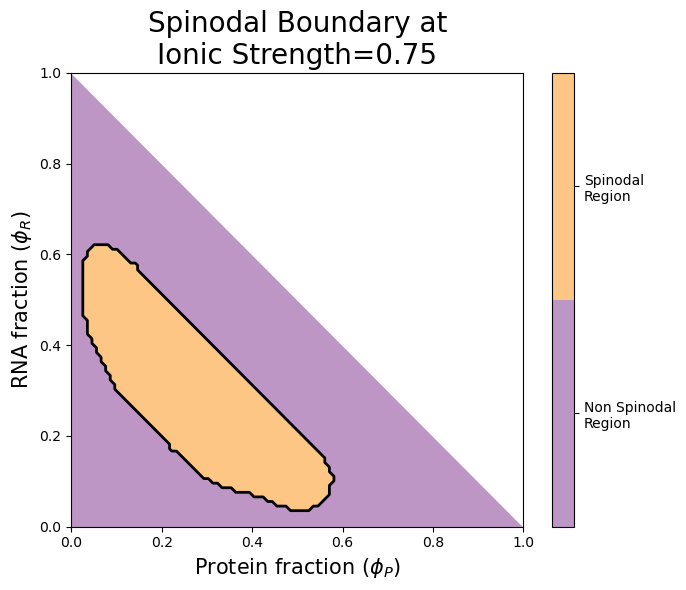

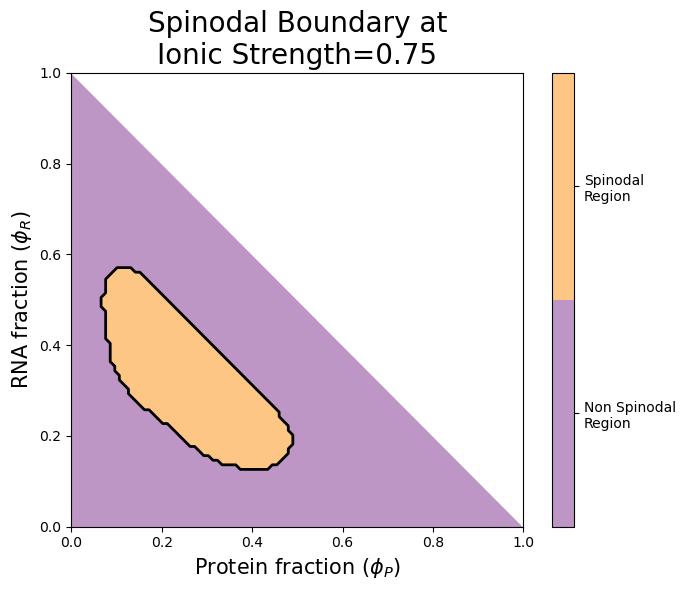

In [11]:
chosen_model_list = source_model_pruner(source_model_list, x_min=0, x_max=1)
print(f"{len(source_model_list)} source models --> {len(chosen_model_list)} source models")
for model in chosen_model_list:
    fig, ax = model_diagram_plot(model, plot_type="phase", x_min =0, x_max = 1,
                                  plot_boundary=True, phase_labels=["Non Spinodal\nRegion", "Spinodal\nRegion"],
                            xlabel=r"Protein fraction $(\phi_P)$", ylabel=r"RNA fraction $(\phi_R)$", title=f"Spinodal Boundary at\nIonic Strength={ionic_strength}")
    ax.fill(outbounds_x, outbounds_y, color='white')